[Leveraging ESG Data to Operationalize Sustainability. November 11, 2020. Antoine Amend. Databricks](https://www.databricks.com/blog/2020/11/11/leveraging-esg-data-to-operationalize-sustainability.html)

https://www.databricks.com/notebooks/esgops_notebooks/01_vessel_etl.html

https://marinecadastre.gov/data/

[Office for Coastal Management, 2023: Nationwide Automatic Identification System 2022, https://www.fisheries.noaa.gov/inport/item/67336](https://www.fisheries.noaa.gov/inport/item/67336)

### M.1371 : Technical characteristics for an automatic identification system using time division multiple access in the VHF maritime mobile frequency band (Rec. ITU-R M.1371-5 )

https://www.itu.int/rec/R-REC-M.1371-5-201402-I/en

| Identifier No. | Vessel Type                                                  |
| -------------- | ------------------------------------------------------------ |
| 50             | Special craft                                                |
| 51             | Pilot vessel                                                 |
| 52             | Search and rescue vessels                                    |
| 53             | Tugs                                                         |
| 54             | Port tenders                                                 |
| 55             | Vessels with anti-pollution facilities or equipment          |
| 56             | Law enforcement vessels                                      |
| 57             | Spare – for assignments to local vessels                     |
| 58             | Spare – for assignments to local vessels                     |
| 59             | Medical transports (as defined in the 1949 Geneva Conventions and Additional Protocols) |
| 60             | Ships and aircraft of States not parties to an armed conflict |
| 0X             | Fishing vessels                                              |
| 1X             | Carrying dangerous goods (DG), harmful substances (HS), or marine pollutants (MP), or IMO hazard or pollutant category X |
| 2X             | Towing vessels                                               |
| 3X             | Vessels engaged in dredging or underwater operations         |
| 4X             | Vessels engaged in diving operations                         |
| 5X             | Reserved for future use                                      |
| 6X             | Passenger ships                                              |
| 7X             | Cargo ships                                                  |
| 8X             | Tankers                                                      |
| 9X             | Other types of ships                                         |

Table 53: Identifiers to be used by ships to report their type (Rec. ITU-R M.1371-5)

In [0]:
df_june = spark.read.table("ais.june")

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("GetSchema").getOrCreate()

df_june.printSchema()

root
 |-- MMSI: string (nullable = true)
 |-- BaseDateTime: timestamp (nullable = true)
 |-- LAT: double (nullable = true)
 |-- LON: double (nullable = true)
 |-- SOG: double (nullable = true)
 |-- COG: double (nullable = true)
 |-- Heading: double (nullable = true)
 |-- VesselName: string (nullable = true)
 |-- IMO: string (nullable = true)
 |-- CallSign: string (nullable = true)
 |-- VesselType: integer (nullable = true)
 |-- Status: integer (nullable = true)
 |-- Length: double (nullable = true)
 |-- Width: double (nullable = true)
 |-- Draft: double (nullable = true)
 |-- Cargo: string (nullable = true)
 |-- TranscieverClass: string (nullable = true)
 |-- filename: string (nullable = true)



In [0]:
from pyspark.sql.functions import count

# Show the number of entries
print("Number of entries in the ais.june table:", df_june.count())

Number of entries in the ais.june table: 249326112


In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DropJuneCargo").getOrCreate()

spark.sql("DROP TABLE IF EXISTS ais.june_cargo")

Out[10]: DataFrame[]

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CreateJuneCargo").getOrCreate()

df_june_cargo = df_june.filter(df_june.VesselType == 70)

df_june_cargo.write.mode("overwrite").saveAsTable("ais.june_cargo")

In [0]:
# read as a spark dataframe the table we created in the previous step
df_ais_june_cargo = spark.read.table("ais.june_cargo")

In [0]:
from pyspark.sql.functions import count

print("Number of entries in the ais.june_cargo table:", df_ais_june_cargo.count())

Number of entries in the ais.june_cargo table: 16864754


In [0]:
df_ais_june_cargo.printSchema()

root
 |-- MMSI: string (nullable = true)
 |-- BaseDateTime: timestamp (nullable = true)
 |-- LAT: double (nullable = true)
 |-- LON: double (nullable = true)
 |-- SOG: double (nullable = true)
 |-- COG: double (nullable = true)
 |-- Heading: double (nullable = true)
 |-- VesselName: string (nullable = true)
 |-- IMO: string (nullable = true)
 |-- CallSign: string (nullable = true)
 |-- VesselType: integer (nullable = true)
 |-- Status: integer (nullable = true)
 |-- Length: double (nullable = true)
 |-- Width: double (nullable = true)
 |-- Draft: double (nullable = true)
 |-- Cargo: string (nullable = true)
 |-- TranscieverClass: string (nullable = true)
 |-- filename: string (nullable = true)



In [0]:
from pyspark.sql.functions import count, desc

result_df = spark.read.table("ais.june_cargo").groupBy("MMSI") \
                        .agg(count("MMSI").alias("MMSI_count")) \
                        .orderBy(desc("MMSI_count"))

In [0]:
result_df.count()

Out[2]: 3064

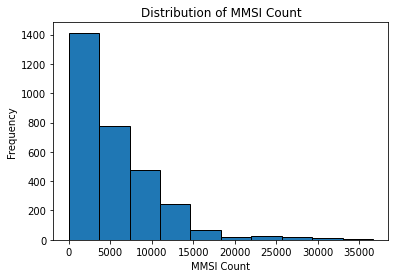

In [0]:
import matplotlib.pyplot as plt

# Extract the MMSI_count column from the DataFrame
mmsi_count = result_df.select("MMSI_count").rdd.flatMap(lambda x: x).collect()

# Create a histogram
plt.hist(mmsi_count, bins=10, edgecolor='black')
plt.xlabel("MMSI Count")
plt.ylabel("Frequency")
plt.title("Distribution of MMSI Count")
plt.show()

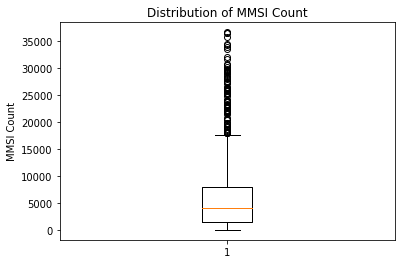

In [0]:
import matplotlib.pyplot as plt

# Extract the MMSI_count column from the DataFrame
mmsi_count = result_df.select("MMSI_count").rdd.flatMap(lambda x: x).collect()

# Create a box plot
plt.boxplot(mmsi_count)
plt.ylabel("MMSI Count")
plt.title("Distribution of MMSI Count")
plt.show()

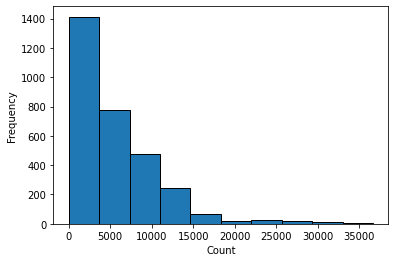

In [0]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = result_df.toPandas()

# Set the number of bins
num_bins = 10

# Create a histogram of the "MMSI_count" column with specified number of bins
plt.hist(pandas_df["MMSI_count"], bins=num_bins, edgecolor='black')

# Set the x-axis label
plt.xlabel("Count")

# Set the y-axis label
plt.ylabel("Frequency")

# Show the plot
plt.show()

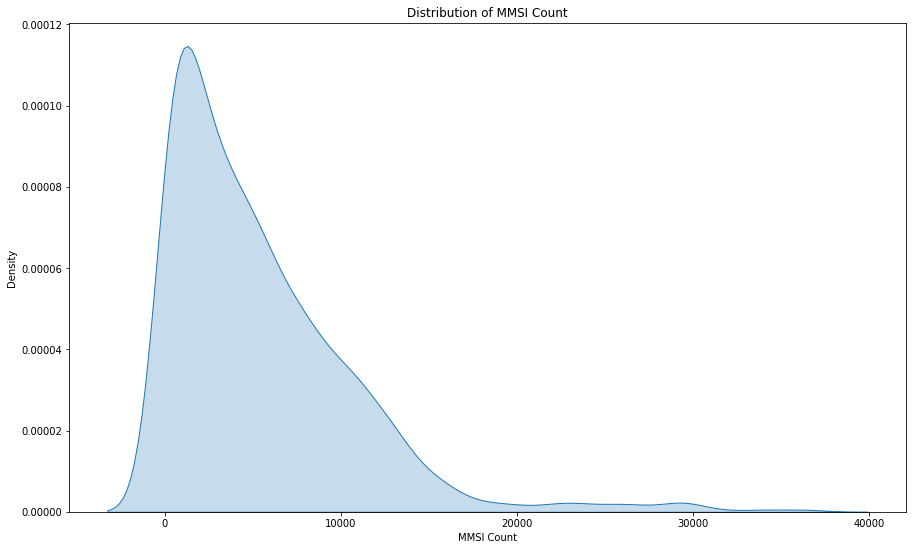

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the MMSI_count column from the DataFrame
mmsi_count = result_df.select("MMSI_count").rdd.flatMap(lambda x: x).collect()

# Create a larger figure
plt.figure(figsize=(15, 9))

# Create a KDE plot using seaborn
sns.kdeplot(mmsi_count, shade=True)
plt.xlabel("MMSI Count")
plt.ylabel("Density")
plt.title("Distribution of MMSI Count")
plt.show()